# Global Temperature Anomaly Comparison (2003–2024)

## Overview
This Notebook visualizes annual global temperature anomalies from 2003 to 2024 using data from NASA `GLB.Ts+dSST.csv` file. The plot compares three datasets: AIRS v6, AIRS v7, and GHCNv4/ERSSTv5, showing how temperature anomalies (relative to the 2007–2016 baseline) vary over time. The analysis highlights peak warming years and long-term trends, providing insights into global climate change.

## Data Source
- **File**: `GLB.Ts+dSST.csv`
- **Datasets**:
  - **AIRS v6**: Atmospheric Infrared Sounder, version 6 (NASA).
  - **AIRS v7**: Atmospheric Infrared Sounder, version 7 (NASA).
  - **GHCNv4/ERSSTv5**: Global Historical Climatology Network and Extended Reconstructed Sea Surface Temperature (NOAA).
- **Columns Used**:
  - `Year`: 2002–2025 (2003–2024 after cleaning).
  - `J-D`: Annual temperature anomaly (°C) averaged from January to December.
- **Data Cleaning**: Missing values (`*******`) are converted to `NaN`, and rows with missing `J-D` values are removed.

## Key Insights
- **Peak Years**: 2016 is often the warmest year across datasets, with anomalies around 0.3–0.4°C.
- **Warming Trends**: All datasets show a positive warming trend, with slopes around 0.01–0.02°C/year, indicating gradual global temperature increases.
- **Dataset Comparison**: AIRS v6 and v7 are closely aligned, while GHCNv4/ERSSTv5 may show slight differences due to methodology.

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

AIRS v6 warming trend: 0.019°C per year
AIRS v7 warming trend: 0.019°C per year
GHCNv4/ERSSTv5 warming trend: 0.026°C per year


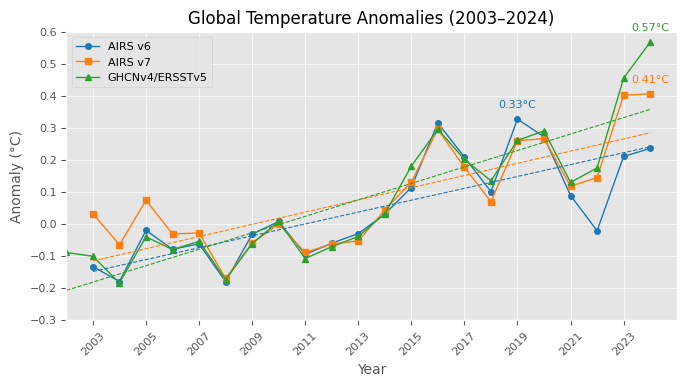

In [135]:
# Load each dataset
df_v6 = pd.read_csv('GLB.Ts+dSST.csv', skiprows=1, nrows=24)
df_v7 = pd.read_csv('GLB.Ts+dSST.csv', skiprows=27, nrows=24)
df_ghcn = pd.read_csv('GLB.Ts+dSST.csv', skiprows=53, nrows=24)

# Convert J-D to numeric
for df in [df_v6, df_v7, df_ghcn]:
    df['J-D'] = pd.to_numeric(df['J-D'], errors='coerce')
    df.dropna(subset=['J-D'], inplace=True)

# Plot
plt.style.use('ggplot') 
plt.figure(figsize=(7, 4))  
plt.plot(df_v6['Year'], df_v6['J-D'], marker='o', label='AIRS v6', color='#1f77b4', markersize=4, linewidth=1)
plt.plot(df_v7['Year'], df_v7['J-D'], marker='s', label='AIRS v7', color='#ff7f0e', markersize=4, linewidth=1)
plt.plot(df_ghcn['Year'], df_ghcn['J-D'], marker='^', label='GHCNv4/ERSSTv5', color='#2ca02c', markersize=4, linewidth=1)

# Peak years 
for df, name, color in [(df_v6, 'AIRS v6', '#1f77b4'), (df_v7, 'AIRS v7', '#ff7f0e'), (df_ghcn, 'GHCNv4/ERSSTv5', '#2ca02c')]:
    max_anomaly = df['J-D'].max()
    max_year = df['Year'][df['J-D'].idxmax()]
    plt.text(max_year, max_anomaly + 0.03, f'{max_anomaly:.2f}°C', color=color, ha='center', va='bottom', fontsize=8)

# Linear trend 
for df, name, color in [(df_v6, 'AIRS v6', '#1f77b4'), (df_v7, 'AIRS v7', '#ff7f0e'), (df_ghcn, 'GHCNv4/ERSSTv5', '#2ca02c')]:
    coeffs = np.polyfit(df['Year'], df['J-D'], 1)
    trend = np.poly1d(coeffs)
    plt.plot(df['Year'], trend(df['Year']), color=color, linestyle='--', linewidth=0.8)
    print(f"{name} warming trend: {coeffs[0]:.3f}°C per year")

plt.title('Global Temperature Anomalies (2003–2024)', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Anomaly (°C)', fontsize=10)
plt.xticks(df_v6['Year'][::2], rotation=45, fontsize=8) # Every other year
plt.yticks(fontsize=8)
plt.grid(True, alpha=0.7)
plt.legend(fontsize=8, loc='upper left')
plt.ylim(-0.3, 0.6)  
plt.xlim(2002, 2025)
plt.tight_layout(pad=1.2)

# Save before showing
plt.savefig('temperature_anomaly_plot.png', dpi=150, bbox_inches='tight')
plt.show()